# Код урока

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)

# sklearn здесь только, чтобы разделить выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split

In [2]:
### Шаг 1. Определение функций, которые понадобяться для обучения
# преобразование массива в бинарный вид результатов

def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

# преобразование массива в необходимый вид
def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = Y[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j + 1
    return arr

# вычисление функции сигмоида
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

# вычисление производной функции сигмоида
def sigmoid_deriv(x):
  # return sigmoid(x) * (1 - sigmoid(x))
  return (x) * (1 - (x))

# нормализация массива 
def normalize(X, axis = -1, order = 2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


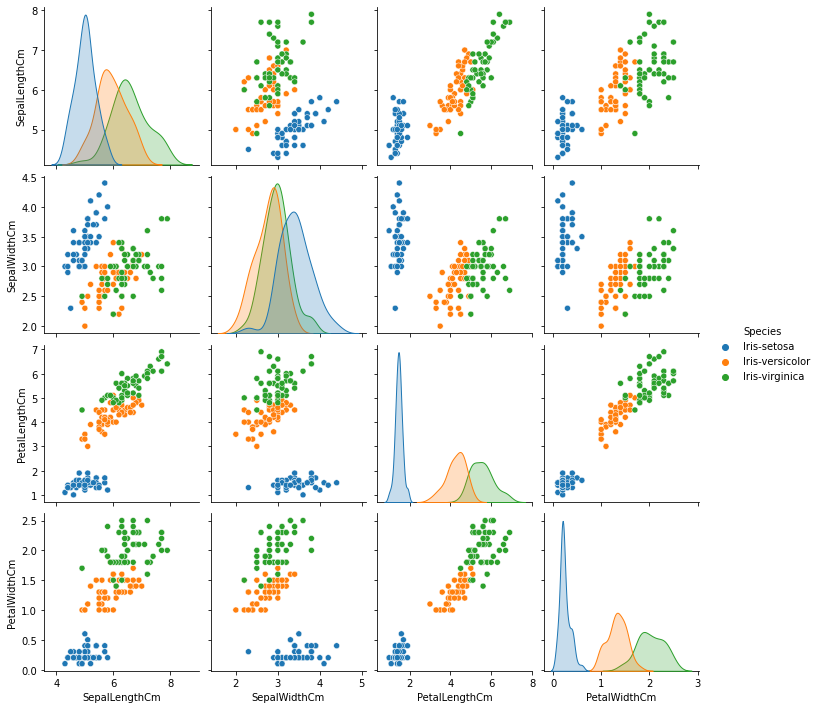

In [3]:
### Шаг 2. Подготовка тренировочных данных
# получение данных из csv файла. укажите здесь путь к файлу Iris.csv

iris_data = pd.read_csv("Iris.csv")
print(iris_data.head()) # раскомментируйте, чтобы посмотреть структуру данных

# репрезентация данных в виде графиков
g = sns.pairplot(iris_data.drop("Id", axis=1), hue="Species")
# plt.show() # раскомментируйте, чтобы позырить

# замена текстовых значений на цифровые
iris_data['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace = True)

# формирование входных данных
columns = ['SepalLengthCm', 'PetalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = pd.DataFrame(iris_data, columns = columns)
# x = normalize(x.as_matrix())
x = normalize(x.values)

# формирование выходных данных (результатов)
columns = ['Species']
y = pd.DataFrame(iris_data, columns = columns)
# y = y.as_matrix()
y = y.values
y = y.flatten()
y = to_one_hot(y)

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)


In [4]:
y[0]

array([1., 0., 0.])

In [5]:
### Шаг 3. Обучение нейронной сети.

# определим число нейронов скрытого слоя
neuron_numb = 5

# присвоение случайных весов

np.random.seed(None)
w0 = 2*np.random.random((4, neuron_numb)) - 1  # для входного слоя - 4 входа, 3 - выхода
w1 = 2*np.random.random((neuron_numb, 3)) - 1  # для внутреннего слоя - 5 входов, 3 - выхода

# print(w0)
# print(w1)

# скорость обучения (learning rate)
n = 0.05

# массив для ошибок, чтобы потом построить график
errors = []

for i in range(10000):

    # прямое распространение (feet forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    # обратное распространение (back propagation) с использованием градиентного спуска
    layer2_error = y_train - layer2 # производная функция потерь - производная квадратичных потерь.
    layer2_delta = layer2_error * sigmoid_deriv(layer2)

    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)

    # коррекция
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n

    # метрика модели
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100

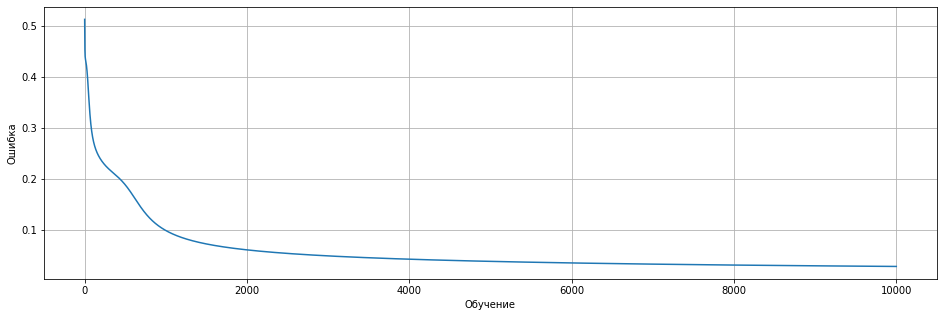

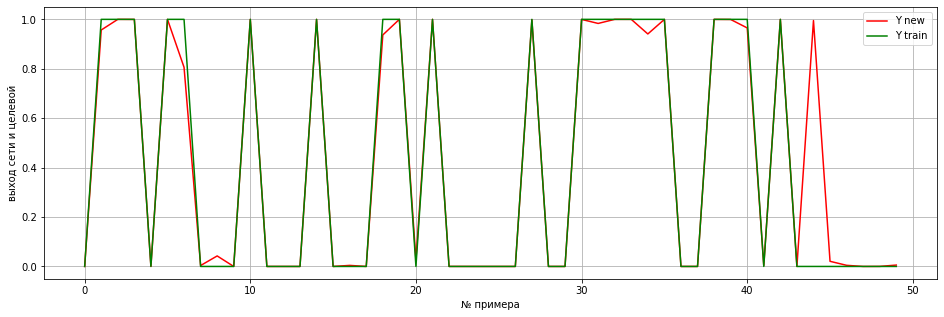

Аккуратность нейронной сети 97.11%


In [6]:
### Шаг 4. Демонстрация полученных результатов.

# черчение диаграммы точности в зависимости от обучения
plt.figure(figsize=(16, 5))
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.grid()
plt.show() # раскомментируйте, чтобы посмотреть.

N = 50

plt.figure(figsize=(16, 5))
plt.plot(layer2[:N, 1], 'r', label = 'Y new')
plt.plot(y_train[:N, 1], 'g', label = 'Y train')
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend()
plt.grid()
plt.show() # раскомментируйте, чтобы посмотреть.

print("Аккуратность нейронной сети " + str(round(accuracy, 2)) + "%")

In [7]:
w1

array([[  4.57945832, -14.48455161,   3.82264357],
       [  1.88585385,  -6.51758153,  -6.24481444],
       [ -8.30071174,   3.71966506,  12.31268375],
       [ -5.86640436,  14.58861893, -21.05787146],
       [ -1.04832039,  -3.58408117,  -4.94793855]])

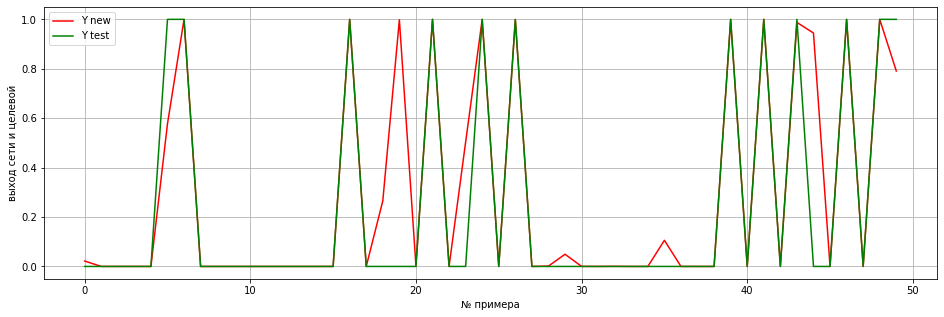

Аккуратность нейронной сети на тесте 94.84%


In [8]:
# прямое распространение (feet forward)
layer0_t = X_test
layer1_t = sigmoid(np.dot(layer0_t, w0))
layer2_t = sigmoid(np.dot(layer1_t, w1))

# обратное распространение (back propagation) с использованием градиентного спуска
layer2_error_t = y_test - layer2_t # производная функция потерь - производная квадратичных потерь.

N = 50

plt.figure(figsize=(16, 5))
plt.plot(layer2_t[:N, 1], 'r', label = 'Y new')
plt.plot(y_test[:N, 1], 'g', label = 'Y test')
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend()
plt.grid()
plt.show() # раскомментируйте, чтобы посмотреть.

# метрика модели
error_t = np.mean(np.abs(layer2_error_t))
accuracy_t = (1 - error_t) * 100


print("Аккуратность нейронной сети на тесте " + str(round(accuracy_t, 2)) + "%")

# Домашнее задание

#### 1. Попробуйте видоизменить параметры разобранной на уроке двухслойной нейронной сети таким образом, чтобы улучшить точность (число нейронов, число эпох, можно изменять число слоев)
#### 2. Проведите анализ - что приводит к ухудшению точности нейронной сети? Что приводит к увеличению ее точности?

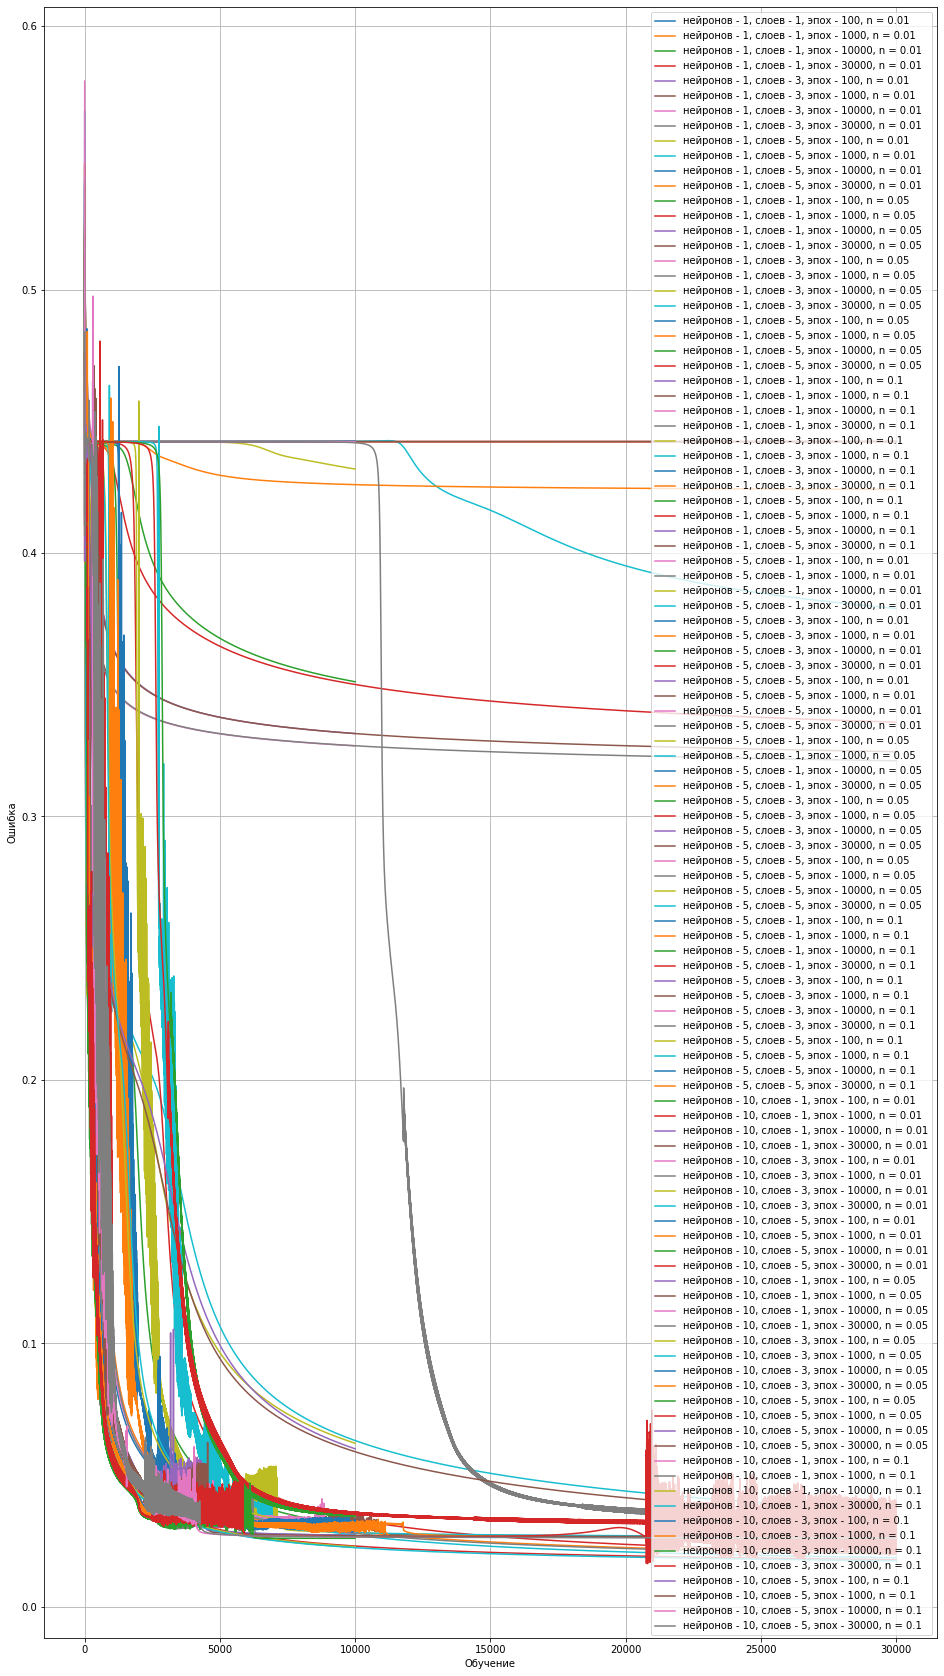

Wall time: 1min 31s


In [9]:
%%time 

fig = plt.figure(figsize=(16, 30))
ax = fig.subplots()

results = pd.DataFrame(columns=['neuron_numb', 'n', 'layers', 'ep', 'accur'])

for neuron_numb in [1, 5, 10]:
    for n in [0.01, 0.05, 0.10]:
        for layers in [1, 3, 5]:
            w = {}
            for ep in [100, 1000, 10000, 30000]:
                # присвоение случайных весов
                np.random.seed(None)
                w[0] = 2*np.random.random((4, neuron_numb)) - 1  # для входного слоя - 4 входа, 3 - выхода
                for l in range(1, layers+1):
                    if l == layers:
                        w[l] = 2*np.random.random((neuron_numb, 3)) - 1  # для внутреннего слоя - 5 входов, 3 - выхода
                    else:
                        w[l] = 2*np.random.random((neuron_numb, neuron_numb)) - 1  # для внутреннего слоя - 4 входа, 4 - выхода

                # массив для ошибок
                errors = []
                
                layer = {}
                layer[0] = X_train
                
                layer_error = {}
                layer_delta = {}

                for i in range(ep):

                    # прямое распространение (feet forward)
                    for l in range(1, layers+2):
                        layer[l] = sigmoid(np.dot(layer[l-1], w[l-1]))

                    # обратное распространение (back propagation) с использованием градиентного спуска
                    for l in reversed(range(1, layers+2)):
                        if l == layers+1:
                            layer_error[l] = y_train - layer[l] # производная функция потерь - производная квадратичных потерь.
                            layer_delta[l] = layer_error[l] * sigmoid_deriv(layer[l])
                        else:
                            layer_error[l] = layer_delta[l+1].dot(w[l].T)
                            layer_delta[l] = layer_error[l] * sigmoid_deriv(layer[l])
                    
                    for l in range(layers+1):
                        # коррекция
                        w[l] += layer[l].T.dot(layer_delta[l+1]) * n

                    # метрика модели
                    error = np.mean(np.abs(layer_error[layers+1]))
                    errors.append(error)
                    accuracy = (1 - error) * 100
                    
                
                # черчение диаграммы точности в зависимости от обучения
                label = f'нейронов - {neuron_numb}, слоев - {layers}, эпох - {ep}, n = {n}'
                ax.plot(errors, label=label)
                
                res_now = pd.DataFrame([[neuron_numb, n, layers, ep, round(accuracy, 2)]],
                                           columns=['neuron_numb', 'n', 'layers', 'ep', 'accur'])
                results = pd.concat([results, res_now])
                
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.grid()
plt.legend(prop={'size': 10})
plt.show()

In [10]:
results

,neuron_numb,n,layers,ep,accur
0,1,0.01,1,100,54.87
0,1,0.01,1,1000,55.91
0,1,0.01,1,10000,64.89
0,1,0.01,1,30000,66.42
0,1,0.01,3,100,54.31
...,...,...,...,...,...
0,10,0.10,3,30000,97.13
0,10,0.10,5,100,56.30
0,10,0.10,5,1000,92.47
0,10,0.10,5,10000,97.34


In [11]:
results.describe()

,n,accur
count,108.000000,108.000000
mean,0.053333,74.960093
std,0.036990,18.634262
min,0.010000,54.180000
25%,0.010000,55.770000
50%,0.050000,68.975000
75%,0.100000,96.932500
max,0.100000,98.250000


In [12]:
def corr_matrix(df, title=''):
    plt.figure(figsize = (15,12))
    sns.set(font_scale=1.4)
    sns.heatmap(df.corr().round(3), annot=True, linewidths=.5, cmap='GnBu')
    plt.title(title)
    plt.show()
    
def corr_lines(df, target, signs, title='Корреляция метрики модели'):
    corr_with_target = df[signs + [target]].corr().iloc[:-1, -1].sort_values(ascending=False)
    plt.figure(figsize=(12, 10))
    sns.barplot(x=corr_with_target.values, y=corr_with_target.index)
    plt.title(f'{target}')
    plt.xlabel(title)
    plt.show()

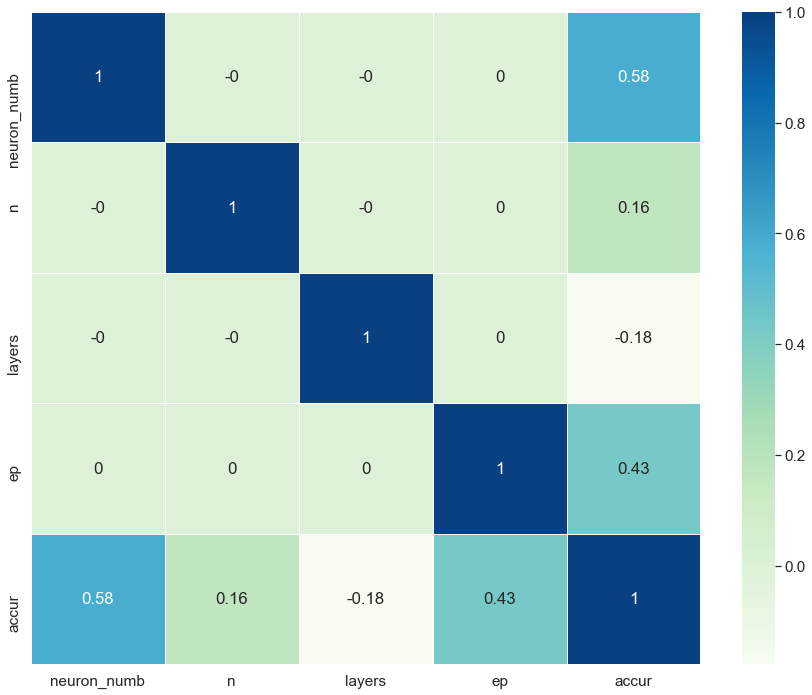

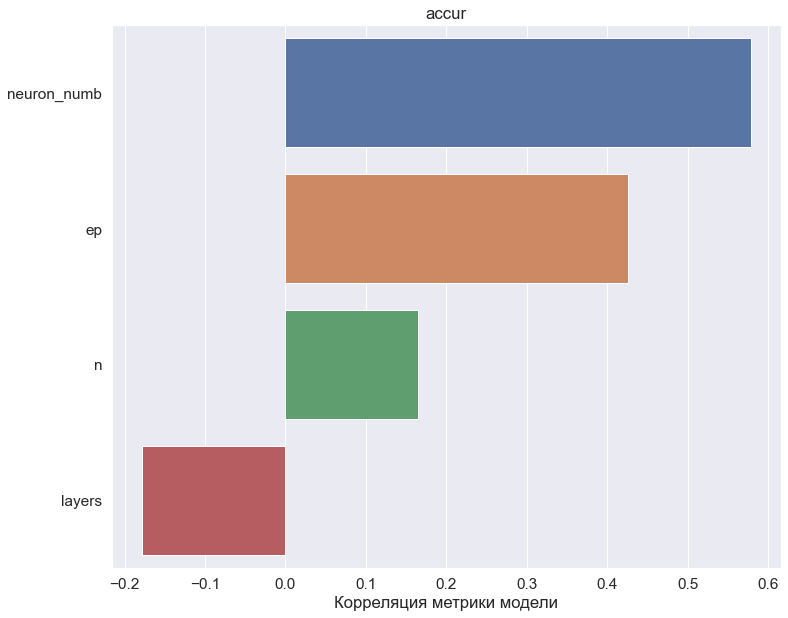

In [13]:
corr_matrix(results.astype('float'))
corr_lines(results.astype('float'), 'accur', results.columns.drop('accur').to_list())

#### Вывод:
* Наибольшее влияние на улучшение точности работы модели оказало число нейронов, а затем количество эпох обучения.
* Увеличение числа слоев нейросети напротив оказало в целом негативный эффект в рассматриваемом примере.